In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import scipy.stats as sps


## Open files

In [47]:
dataset = np.loadtxt("Problem_03/Problem_03_file_001.dat", delimiter="\t")
x = dataset[:, 0]
y = dataset[:, 1]
y

array([ 0.499314,  0.37189 ,  0.450005, -0.673299,  0.821797, -0.587986,
        0.877307,  1.688519,  0.420468,  0.229882,  0.786941,  0.368433,
        0.343098,  0.91379 ,  1.14498 ,  0.580122, -0.07343 ,  0.863255,
        1.05706 , -0.921886,  1.307867,  0.037455,  0.643876,  0.589525,
        0.202395,  1.19329 ,  1.936108,  0.353054,  1.177607,  0.236782,
       -0.104723,  0.556737,  0.112083, -1.108566,  0.154853,  0.78304 ,
        0.7896  ,  0.926098,  0.118557, -0.636997,  0.850951, -0.21103 ,
       -1.334931,  0.580261,  0.573644,  0.218752,  0.148524,  1.030261,
        0.821945, -0.819351, -1.225966,  1.054021,  0.473287, -0.448566,
        0.018661,  0.453036,  0.753759,  0.204689,  0.383317,  0.343571,
       -0.361855,  0.088135, -0.732734, -0.667992, -1.149376,  1.187086,
        1.347151,  0.166102, -0.42135 ,  0.854809, -1.001836,  0.122378,
       -0.042837, -1.750582, -0.960712, -1.663514,  1.184445, -1.648055,
       -1.175195, -0.965812,  0.82975 , -0.946077, 

### Модель линейной регрессии

In [110]:
import scipy.stats as sps

n = len(x)
lin_model = sps.linregress(x, y)
k, b = lin_model.slope, lin_model.intercept
k_err, b_err = lin_model.stderr, lin_model.intercept_stderr

k_conf = sps.t.interval(0.95, df = n-2, loc=k, scale=k_err)
b_conf = sps.t.interval(0.95, df = n-2, loc=b, scale=b_err)

print('Для уровня значимости α = 5% оптимальные параметры и доверительные пределы следующие:')
print(f"k = {k:0.4f}  [L, R]=[{k_conf[0]:0.4f} - {k_conf[1]:0.4f}]")
print(f"b = {b:0.4f}   [L, R]=[{b_conf[0]:0.4f} - {b_conf[1]:0.4f}]")

Для уровня значимости α = 5% оптимальные параметры и доверительные пределы следующие:
k = -1.2493  [L, R]=[-1.2956 - -1.2030]
b = 0.6922   [L, R]=[0.5585 - 0.8260]


<IPython.core.display.Javascript object>


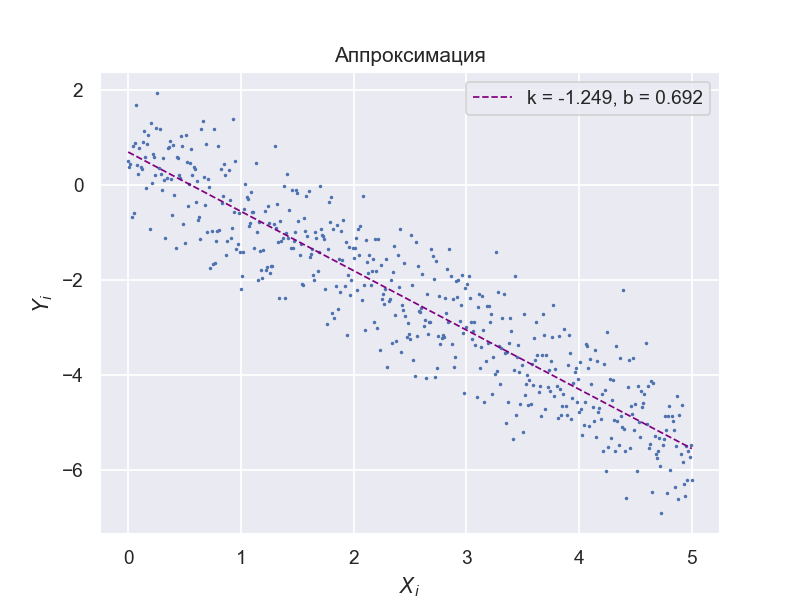

In [111]:
%matplotlib notebook
sns.set_theme()

plt.scatter(x, y, s=1)
plt.plot(x, k*x+b, lw=1, ls='--', color='purple', label='k = {:0.03f}, b = {:0.03f}'.format(k, b))

plt.legend()
plt.xlabel(r'$X_i$')
plt.ylabel(r'$Y_i$')
plt.title('Аппроксимация')
plt.savefig('data.pdf')

<IPython.core.display.Javascript object>


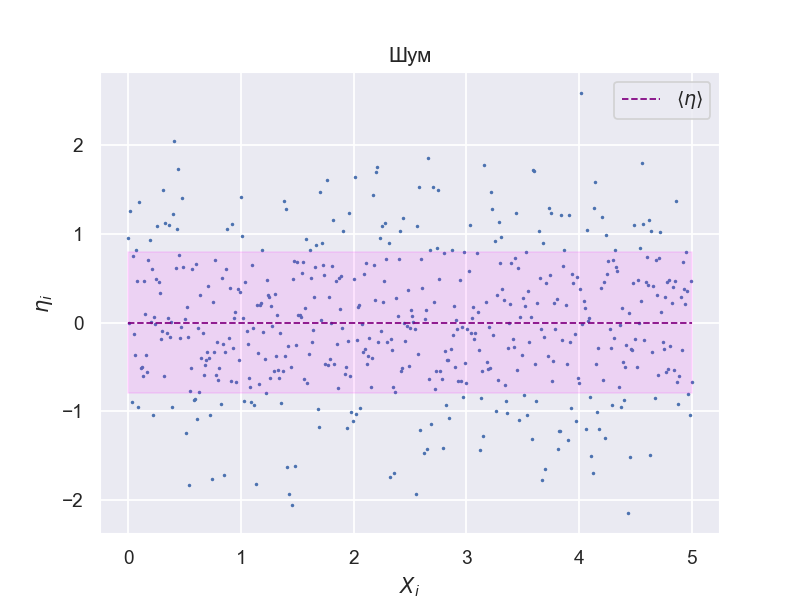

In [213]:
%matplotlib notebook
sns.set_theme()

noise = y - (k*x+b)
plt.scatter(x, noise, s=1)
plt.plot(x, np.mean(noise)*np.ones_like(x), lw=1, ls='--', color='purple', label=r'$\langle\eta\rangle$')
plt.fill_between(x, -np.std(noise), np.std(noise), color='magenta', alpha=0.1)

plt.xlabel(r'$X_i$')
plt.ylabel(r'$\eta_i$')
plt.legend()
plt.title('Шум')
plt.savefig('noise.pdf')

<IPython.core.display.Javascript object>


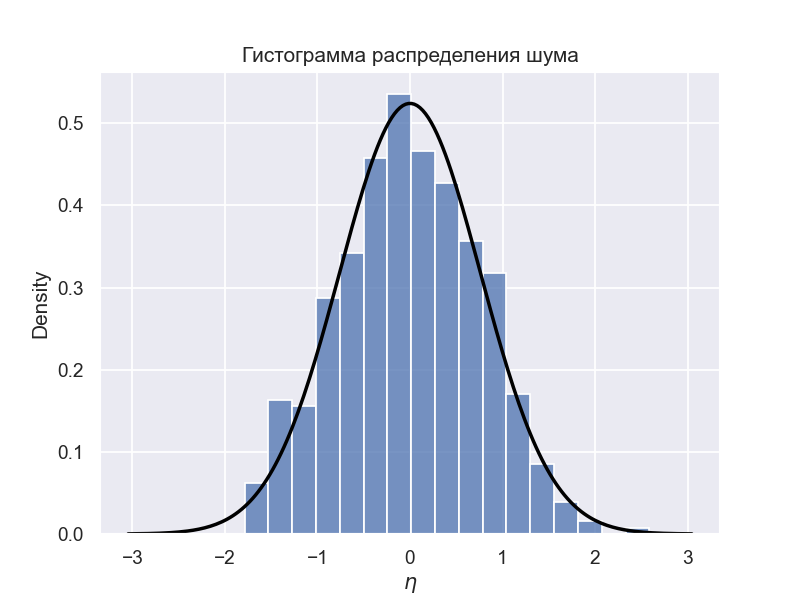

In [123]:
%matplotlib notebook
sns.set_theme()
from scipy.stats import norm

from scipy import stats

def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)
    
ax = sns.histplot(x=noise, stat="density")
normal(noise.mean(), noise.std())
plt.title('Гистограмма распределения шума')
plt.xlabel(r'$\eta$')
plt.savefig('noise_hist.pdf')

In [214]:
print('{:0.04f}'.format(np.std(noise)))

0.7973


<IPython.core.display.Javascript object>


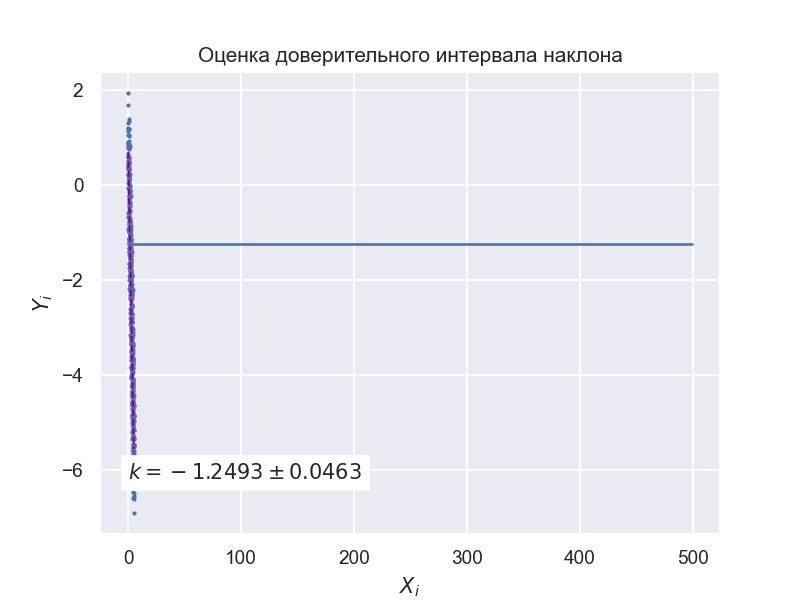

In [129]:
%matplotlib notebook
sns.set_theme()

plt.scatter(x, y, s=2)
plt.plot(x, k*x+b, ls='--', color='purple', lw=1)

x_b = x - np.mean(x)
y_b = np.mean(y)

plt.fill_between(x, k_conf[0]*x_b+y_b, k_conf[1]*x_b+y_b, color='magenta', alpha=0.4)

plt.text(0.2, -6.2, r'$k={:0.04f}\pm{:0.04f}$'.format(k, k-k_conf[0]), bbox=dict(fill=True, color='white', linewidth=1))

plt.title('Оценка доверительного интервала наклона')
plt.xlabel(r'$X_i$')
plt.ylabel(r'$Y_i$')
plt.savefig('slope.pdf')

<IPython.core.display.Javascript object>


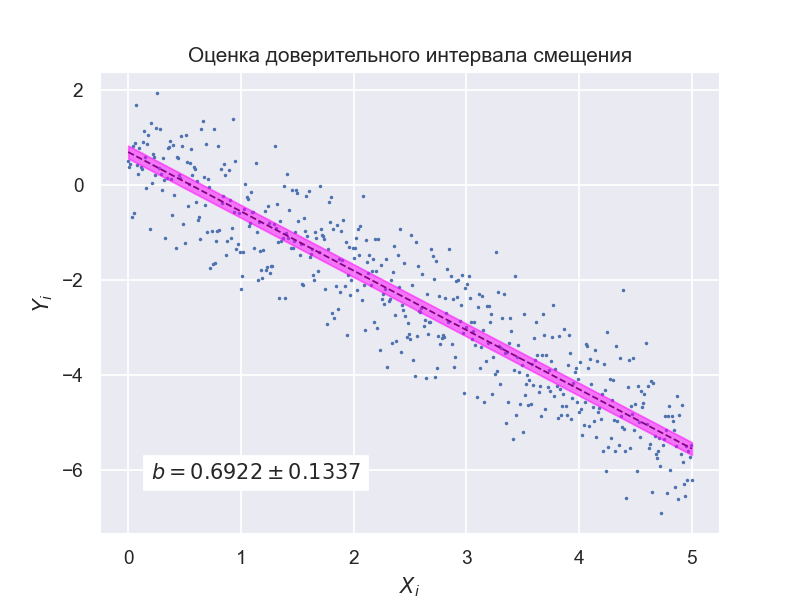

In [64]:
%matplotlib notebook
sns.set_theme()

plt.scatter(x, y, s=1)
plt.plot(x, k*x+b, ls='--', color='purple', lw=1)

x_b = x - np.mean(x)
y_b = np.mean(y)

plt.fill_between(x, k*x+b_conf[0], k*x+b_conf[1], color='magenta', alpha=0.5)

plt.text(0.2, -6.2, r'$b={:0.04f}\pm{:0.04f}$'.format(b, b-b_conf[0]), bbox=dict(fill=True, color='white', linewidth=1))

plt.title('Оценка доверительного интервала смещения')
plt.xlabel(r'$X_i$')
plt.ylabel(r'$Y_i$')
plt.savefig('shift.pdf')

In [150]:
sigma_n = np.sqrt(np.sum((y-(k*x+b))**2)/(n-2)) #среднеквадратичное отклонение шума
sigma_x = np.sqrt(np.sum((x-np.mean(x))**2)/n)

sigma_k = sigma_n/sigma_x/np.sqrt(n)
sigma_b = np.sqrt(sigma_n**2/n+sigma_k**2*np.mean(x)**2)

print('    Analytic Program')
print(f"σ_k {sigma_k:0.4f}  {(k_conf[1]-k_conf[0])/4:0.4f}")
print(f"σ_b {sigma_b:0.4f}  {(b_conf[1]-b_conf[0])/4:0.4f}")

    Analytic Program
σ_k 0.0236  0.0231
σ_b 0.0681  0.0669


## Все реализации

In [144]:
K = []
B = []
K_conf = []
B_conf = []
Noise = []
Noise_std = []
for file in os.listdir('Problem_03/'):
    dataset = np.loadtxt(os.path.join("Problem_03/", file), delimiter="\t")
    x = dataset[:, 0]
    y = dataset[:, 1]
    
    n = len(x)
    lin_model = sps.linregress(x, y)
    k, b = lin_model.slope, lin_model.intercept
    k_err, b_err = lin_model.stderr, lin_model.intercept_stderr

    k_conf = sps.t.interval(0.95, df = n-2, loc=k, scale=k_errа)
    b_conf = sps.t.interval(0.95, df = n-2, loc=b, scale=b_err)
    
    noise = y-k*x-b
    Noise.append(np.mean(noise))
    Noise_std.append(np.std(noise))
    K.append(k)
    B.append(b)
    K_conf.append(np.abs(k-k_conf[0]))
    B_conf.append(np.abs(b-b_conf[0]))

In [211]:
%matplotlib notebook
print(np.mean(K), np.std(K))
print(np.mean(B), np.std(B))
print(np.mean(K_conf), np.std(K_conf))
print(np.mean(B_conf), np.std(B_conf))
print(np.mean(Noise), np.std(Noise))
print(np.mean(Noise_std), np.std(Noise_std))

-1.2507243951585276 0.023171635599223923
0.7001260075569978 0.06601503910418938
0.04840461702352362 0.001416793288642853
0.139801941931648 0.0040919743869007015
1.5467777868031122e-17 2.9938226077445644e-16
0.7959404145455568 0.02329701393856142


<IPython.core.display.Javascript object>


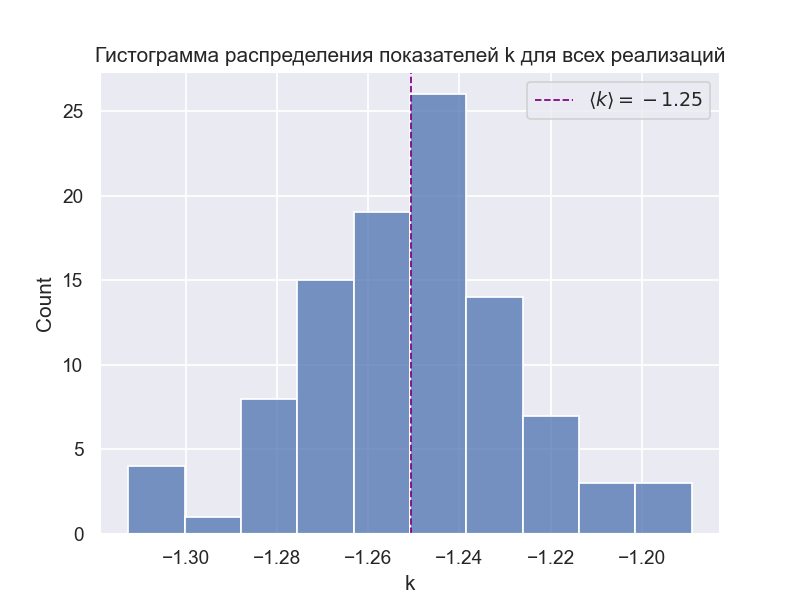

In [193]:
%matplotlib notebook
sns.set_theme()

sns.histplot(K)
plt.axvline(x=np.mean(K), color='purple', lw=1, ls='--', label=r'$\langle k \rangle={:0.02f}$'.format(np.mean(K)))
plt.legend()
plt.xlabel('k')
plt.title('Гистограмма распределения показателей k для всех реализаций')
plt.savefig('k_hist.pdf')

<IPython.core.display.Javascript object>


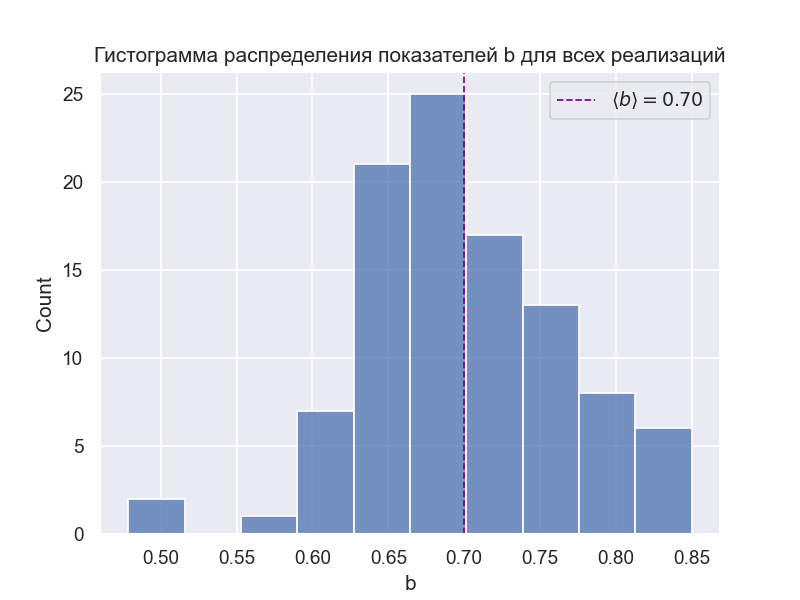

In [192]:
%matplotlib notebook
sns.set_theme()

sns.histplot(B, bins=10)
plt.axvline(x=np.mean(B), color='purple', lw=1, ls='--', label=r'$\langle b \rangle={:0.02f}$'.format(np.mean(B)))
plt.legend()
plt.xlabel('b')
plt.title('Гистограмма распределения показателей b для всех реализаций')
plt.savefig('b_hist.pdf')

In [215]:
K = np.array(K)
dK = K - np.mean(K)
B = np.array(B)
dB = B - np.mean(B)
np.mean(dK*dB)/((np.std(K))*(np.std(B)))

-0.847416711906261

In [208]:
(np.std(dK))

0.023171635599223923

In [209]:
np.mean((dK)**2)

0.0005369246963432214

<IPython.core.display.Javascript object>


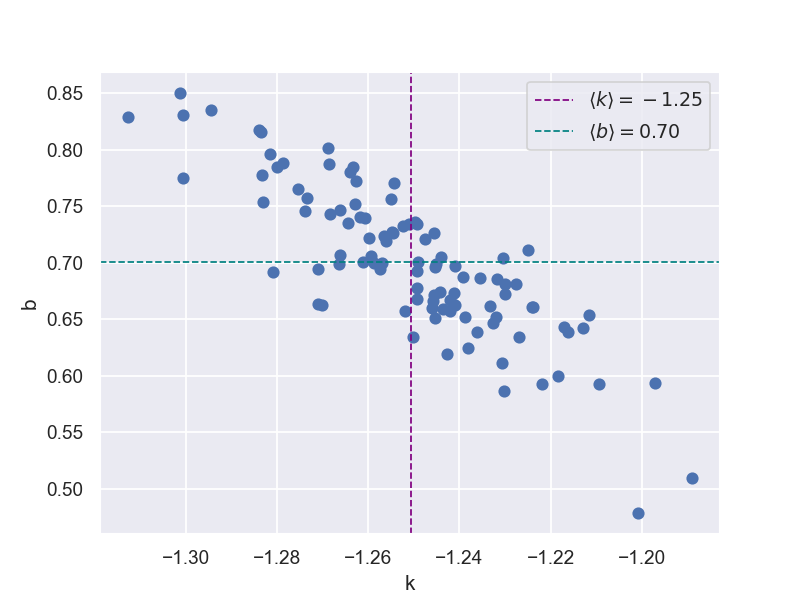

In [224]:
%matplotlib notebook
sns.set_theme()
plt.scatter(K, B)
plt.xlabel('k')
plt.ylabel('b')
plt.axvline(x=np.mean(K), ls='--', color='purple', lw=1, label=r'$\langle k \rangle={:0.02f}$'.format(np.mean(K)))
plt.axhline(y=np.mean(B), ls='--', color='teal', lw=1, label=r'$\langle b \rangle={:0.02f}$'.format(np.mean(B)))
plt.legend()
plt.savefig('kb.pdf')

In [212]:
np.mean(K*B)/(np.std(K)*np.std(B))

-573.2983351242794

<IPython.core.display.Javascript object>


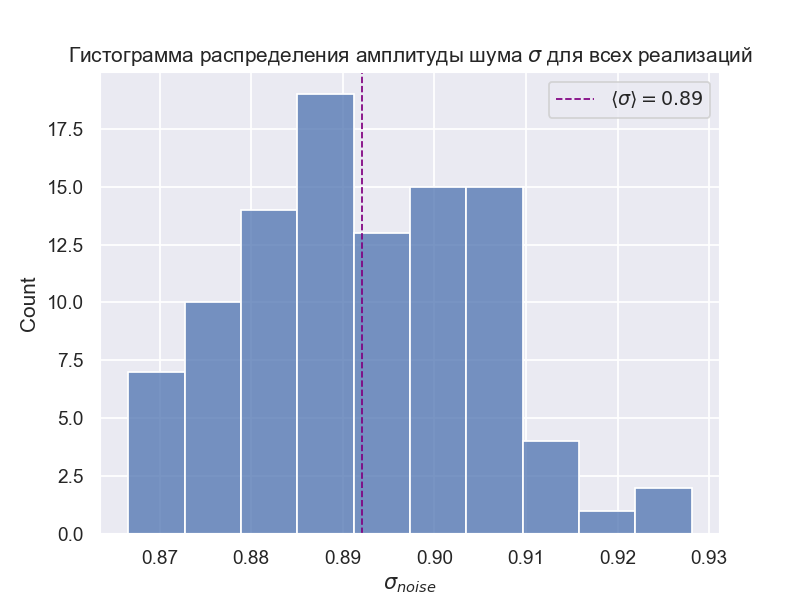

In [204]:
%matplotlib notebook
sns.set_theme()
sigma = np.sqrt(np.array(Noise_std))
sns.histplot(sigma, bins=10)
plt.axvline(x=np.mean(sigma), color='purple', lw=1, ls='--', label=r'$\langle \sigma \rangle={:0.02f}$'.format(np.mean(sigma)))
plt.legend()
plt.xlabel(r'$\sigma_{noise}$')
plt.title('Гистограмма распределения амплитуды шума $\sigma$ для всех реализаций')
plt.savefig('sigma_hist.pdf')

In [50]:
X = []
Y = []
for file in os.listdir('Problem_03/'):
    dataset = np.loadtxt(os.path.join("Problem_03/", file), delimiter="\t")
    X.append(dataset[:, 0])
    Y.append(dataset[:, 1])
Y = np.reshape(Y, (1,-1))
X = np.reshape(X, (1,-1))
print(np.shape(Y[0]))
Y = np.array(Y[0])
X = np.array(X[0])
Y

(50100,)


array([ 0.499314,  0.37189 ,  0.450005, ..., -6.54951 , -5.0564  ,
       -6.202622])

<IPython.core.display.Javascript object>


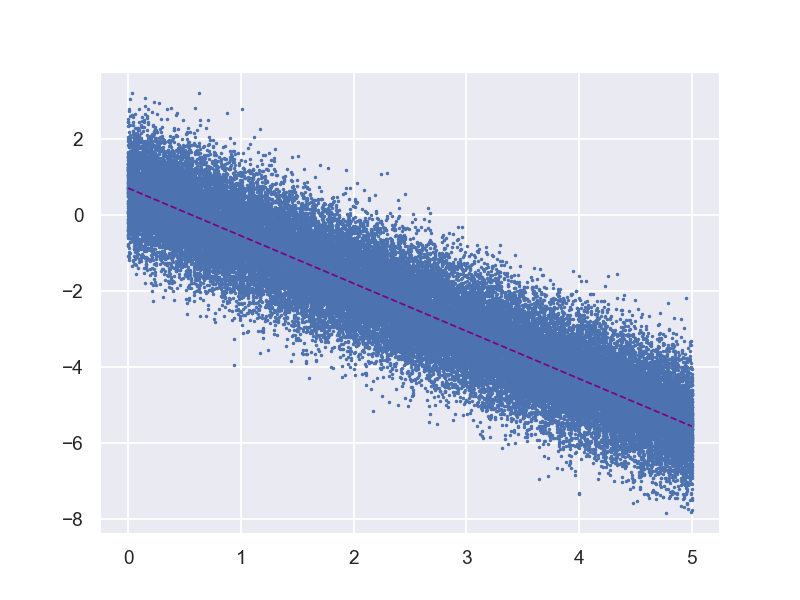

Для уровня значимости α = 5% оптимальные параметры и доверительные пределы следующие:
k = -1.2507  [L, R]=[-1.2556 - -1.2459]
b = 0.7001   [L, R]=[0.6862 - 0.7141]
-1.2507243951585263


In [51]:
%matplotlib notebook
sns.set_theme()
plt.scatter(X, Y, s=1)
n = len(X)
lin_model = sps.linregress(X, Y)
k, b = lin_model.slope, lin_model.intercept
k_err, b_err = lin_model.stderr, lin_model.intercept_stderr

k_conf = sps.t.interval(0.95, df = n-2, loc=k, scale=k_err)
b_conf = sps.t.interval(0.95, df = n-2, loc=b, scale=b_err)

plt.plot(X, k*X+b, ls='--', color='purple', lw=1)
noise = Y-k*X-b
print('Для уровня значимости α = 5% оптимальные параметры и доверительные пределы следующие:')
print(f"k = {k:0.4f}  [L, R]=[{k_conf[0]:0.4f} - {k_conf[1]:0.4f}]")
print(f"b = {b:0.4f}   [L, R]=[{b_conf[0]:0.4f} - {b_conf[1]:0.4f}]")

print(k)

<IPython.core.display.Javascript object>


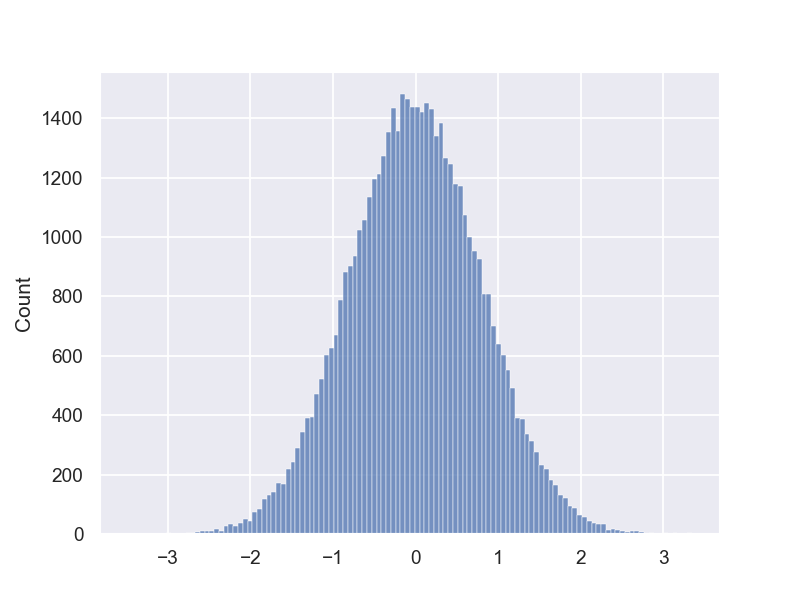

<AxesSubplot:ylabel='Count'>

In [53]:
%matplotlib notebook
sns.set_theme()
sns.histplot(noise)

In [34]:
def funx(x,k,b):
    return k*x+b
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, X, Y)

In [37]:
np.sqrt(np.diag(pcov))*2

array([0.00492885, 0.01423547])

In [36]:
-1.2507+1.2556

0.0049000000000001265

In [40]:
l1 = [1,3]
l2 = [2,4]
res = [x for y in zip(l1, l2) for x in y]
res

[1, 2, 3, 4]

In [48]:
output = np.array(['k', 'b', 'k_conf', 'b_conf', 'Noise intensity'])
for file in os.listdir('Problem_03/'):
    dataset = np.loadtxt(os.path.join("Problem_03/", file), delimiter="\t")
    x = dataset[:, 0]
    y = dataset[:, 1]
    coef, cov = np.polyfit(x, y, 1, cov=True)
    cov = 2*np.sqrt(np.diag(cov))
    noise = y-np.polyval(coef, x)
    sigma = np.std(noise)
    res = np.concatenate((coef, cov, [sigma]))
    #print(np.shape(output),np.shape(res))
    output=np.vstack((output, np.round(res, 6)))

In [49]:
np.savetxt('Problem_3.csv', output, fmt="%s", delimiter=',')